In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
pd.set_option('display.max_columns', None)

In [263]:
s2018 = pd.read_excel('LeagueHistory.xlsx', sheetname='2018')
#            .drop(['TOTAL', 'Mean', 'Std', 'Median', 
#                  'Year', 'Owner','Playoffs'],1)
exp2018 = pd.read_excel('ExpPointsRemaining.xlsx')


labels = np.array(s2018['Team_Name'])
s2018

/Users/Brenton/anaconda/lib/python3.5/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Team_Name,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,TOTAL,Mean,Std,Median,Year,Owner,Playoffs
0,GoBias Industries,133.06,100.12,130.44,151.78,132.72,110.74,114.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,872.94,124.705714,17.379711,130.44,2018,Schulwolf,NaN
1,Peyton Teabag,134.60,115.38,97.72,90.86,99.50,108.36,131.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,778.02,111.145714,16.938877,108.36,2018,Will,NaN
2,LeSean Hara,125.74,109.60,122.10,100.02,101.78,130.50,85.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775.70,110.814286,16.098740,109.60,2018,Eli,NaN
3,Sackwash Lyfe,99.94,114.58,74.58,130.78,109.02,130.82,111.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,771.00,110.142857,19.341204,111.28,2018,Tommy,NaN
4,Gee Whiz Darnell,101.44,110.60,102.64,133.30,97.70,84.88,135.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,765.88,109.411429,18.671168,102.64,2018,Brenton,NaN
5,Schmop,104.36,100.96,91.54,131.20,78.36,126.70,130.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763.74,109.105714,20.829901,104.36,2018,Burnett,NaN
6,Burnett = Microdong,102.26,127.50,122.44,108.88,94.80,80.60,87.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,723.74,103.391429,17.459289,102.26,2018,Mike,NaN
7,Redemption317,107.62,124.56,86.68,114.38,94.20,69.94,80.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,677.62,96.802857,19.585768,94.20,2018,Cam,NaN
8,Jasjaap's Primo Team,98.74,67.74,104.80,94.32,108.48,119.90,66.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.46,94.351429,20.272164,98.74,2018,Jasjaap,NaN
9,Mr. Fans Noodle Haus,117.88,110.96,50.42,76.76,97.94,125.60,78.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,657.98,93.997143,26.805316,97.94,2018,Jay,NaN


In [273]:
Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 
         'Brenton':4, 'Burnett':5, 'Jay':6, 'Mike':7, 
         'Tommy':8, 'Todd':9, 'Kevin':10, 'Jasjaap': 11} 

TeamDict = {'GoBias Industries':0, 'LeSean Hara':1, 'Redemption317':2, 
            'Peyton Teabag':3, 'Gee Whiz Darnell':4, 'Schmop':5, 
            'Mr. Fans Noodle Haus':6, 'Burnett = Microdong':7, 'Sackwash Lyfe':8, 
            'Shiva Volodarskaya':9, 'Radical Shizzlam':10, "Jasjaap's Primo Team": 11} 

past_score = s2018.loc[:,'Team_Name':'Week 7']
past_score['key'] = past_score['Team_Name'].map(lambda x: TeamDict[x]) 
past_score = past_score.sort_values(by='key').reset_index(drop=True)
past = np.array(past_score.drop(['Team_Name', 'key'], 1))
labs = past_score['Team_Name']

L=['GoBias Industries', 'LeSean Hara', 'Redemption317',
    'Peyton Teabag', 'Gee Whiz Darnell', 'Schmop',
    'Mr. Fans Noodle Haus','Burnett = Microdong','Sackwash Lyfe',
    'Shiva Volodarskaya','Radical Shizzlam',"Jasjaap's Primo Team"]

In [92]:
exp2018

,Team,Proj,ProjPPG,Mean,Predicted_Mean
0,LeSean Hara,935.64,103.960000,110.814286,106.244762
1,Burnett = Microdong,930.87,103.430000,103.391429,103.417143
2,Sackwash Lyfe,922.09,102.454444,110.142857,105.017249
3,GOBias Industries,920.17,102.241111,124.705714,109.729312
4,Gee Whiz Darnell,885.60,98.400000,109.411429,102.070476
5,Jasjaap's Primo Team,864.91,96.101111,94.351429,95.517884
6,Mr. Fans Noodle Haus,864.30,96.033333,93.997143,95.354603
7,Shiva Volodarskaya,862.67,95.852222,87.628571,93.111005
8,Peyton Teabag Party,857.36,95.262222,111.145714,100.556719
9,Redemption317,854.42,94.935556,96.802857,95.557989


In [267]:
Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 
         'Brenton':4, 'Burnett':5, 'Jay':6, 'Mike':7, 
         'Tommy':8, 'Todd':9, 'Kevin':10, 'Jasjaap': 11} 
        #not used, just for reference

WINS = np.array([3,6,1,4,3,5,2,6,5,1,3,3]).copy()

In [268]:
def simulate_one_half_season_scores(df):
    #df is predicted scores table
    Lesean_scores = np.random.normal(df.loc[0, 'Predicted_Mean'], 18, 7)
    Micro_scores = np.random.normal(df.loc[1, 'Predicted_Mean'], 18, 7)
    Sack_scores = np.random.normal(df.loc[2, 'Predicted_Mean'], 18, 7)
    GoBias_scores = np.random.normal(df.loc[3, 'Predicted_Mean'], 18, 7)
    Gee_scores = np.random.normal(df.loc[4, 'Predicted_Mean'], 18, 7)
    Jasjaap_scores = np.random.normal(df.loc[5, 'Predicted_Mean'], 18, 7)
    MrFan_scores = np.random.normal(df.loc[6, 'Predicted_Mean'], 18, 7)
    Shiva_scores = np.random.normal(df.loc[7, 'Predicted_Mean'], 18, 7)
    Peyton_scores = np.random.normal(df.loc[8, 'Predicted_Mean'], 18, 7)
    Redemption_scores = np.random.normal(df.loc[9, 'Predicted_Mean'], 18, 7)
    Schmop_scores = np.random.normal(df.loc[10, 'Predicted_Mean'], 18, 7)
    Radical_scores = np.random.normal(df.loc[11, 'Predicted_Mean'], 18, 7)


    remaining_SCORES = np.array([GoBias_scores, Lesean_scores, Redemption_scores, 
                                 Peyton_scores, Gee_scores, Schmop_scores, 
                                 MrFan_scores, Micro_scores, Sack_scores, 
                                 Shiva_scores, Radical_scores, Jasjaap_scores])
    return(remaining_SCORES)

In [269]:
#remaining_SCORES = simulate_one_half_season_scores(exp2018)
#SCORING = np.hstack((past, remaining_SCORES))

In [270]:
def simulate_one_half_season_matchups(scoring_array, wins_array, labs, fair=False):

    WINS8 = week8(scoring_array, wins_array)
    WINS9 = week9(scoring_array, WINS8)
    WINS10 = week10(scoring_array, WINS9)
    WINS11 = week11(scoring_array, WINS10)
    
    if fair==False:
        WINS12 = week12(scoring_array, WINS11)
        WINS13 = week13(scoring_array, WINS12)
        wins_per_team = tuple(week14(scoring_array, WINS13))
    elif fair==True:
        WINS12 = week_fair(scoring_array, WINS11, week=12)
        WINS13 = week_fair(scoring_array, WINS12, week=13)
        wins_per_team = tuple(week_fair(scoring_array, WINS13, week=14))

    #return final results
    losses_per_team = tuple([14-w for w in wins_per_team])
    score_per_team = tuple(scoring_array.sum(axis=1))
    label_per_team =  tuple(labs)
    standings = pd.DataFrame(np.vstack((wins_per_team, losses_per_team, score_per_team)).T, index=label_per_team)
    standings = standings.rename(columns={0:'W', 1:'L', 2:'Pts'})    
    
    standings['Pts'] = standings['Pts'].astype(float)
    standings = standings.sort_values(by=['W', 'Pts'], ascending=[False, False])
    
    standings['Place'] = np.arange(1,13)
    standings['Playoffs'] = np.where(standings['Place'] < 5, 1, 0)
    standings['Top'] = np.where(standings['Place'] == 1, 1, 0)
    standings['Sacko'] = np.where(standings['Place'] == 12, 1, 0)
    
    places = np.array(standings['Place'])
    playoffs = np.array(standings['Playoffs'])
    tops = np.array(standings['Top'])
    sackos = np.array(standings['Sacko'])
    
    return standings

In [274]:
def simulate_many_half_seasons(exp_score_array, old_score_array,
                               wins_array, labs, sims = 2, fair=False):
    '''
    @sims is the number of simulations you would like to run.
    '''
    WINS = np.array([3,6,1,4,3,5,2,6,5,1,3,3])
    remaining_SCORES = simulate_one_half_season_scores(exp_score_array)
    SCORES = np.hstack((old_score_array, remaining_SCORES))
    TOTAL = simulate_one_half_season_matchups(SCORES, wins_array, labs)
    
    for i in range(1,sims):
        WINS = np.array([3,6,1,4,3,5,2,6,5,1,3,3])
        remaining_SCORES = simulate_one_half_season_scores(exp_score_array)
        SCORES = np.hstack((old_score_array, remaining_SCORES))
        SEASON_DF = simulate_one_half_season_matchups(SCORES, WINS, labs)
        WINS = wins_array.copy()
        for col in TOTAL.columns.values:
            TOTAL[col] = TOTAL[col]/(i+1)*i + SEASON_DF[col]/(i+1) #Average is continusously updated across trials
    return TOTAL

def clean_total(total):
    total['W'] = round(total['W'], 2)
    total['L'] = 14-total['W']
    total['Pts'] = round(total['Pts'], 2)
    total['Place'] = round(total['Place'], 1)
    total['Playoffs'] = round(total['Playoffs'], 3)*100
    total['Top'] = round(total['Top'], 3)*100
    total['Sacko'] = round(total['Sacko'], 3)*100
    total = total.sort_values(by='Place')
    return total

In [277]:
wins_array = np.array([3,6,1,4,3,5,2,6,5,1,3,3]).copy()
Sims = simulate_many_half_seasons(exp2018, past, wins_array, labs, sims = 100000)

In [278]:
clean_total(Sims)

,W,L,Pts,Place,Playoffs,Top,Sacko
LeSean Hara,10.56,3.44,1527.41,2.0,93.5,52.8,0.0
Burnett = Microdong,9.95,4.05,1447.59,3.0,81.6,19.0,0.0
Sackwash Lyfe,9.05,4.95,1515.32,3.6,68.1,13.3,0.0
Schmop,8.96,5.04,1473.18,4.0,61.2,9.0,0.0
GoBias Industries,7.97,6.03,1667.32,4.6,49.7,3.0,0.0
Peyton Teabag,7.74,6.26,1500.37,5.4,30.8,2.5,0.0
Gee Whiz Darnell,6.84,7.16,1493.44,6.5,13.2,0.4,0.1
Jasjaap's Primo Team,5.73,8.27,1327.06,8.5,1.4,0.0,2.5
Mr. Fans Noodle Haus,5.13,8.87,1322.98,9.2,0.4,0.0,7.7
Radical Shizzlam,4.84,9.16,1197.26,10.0,0.2,0.0,13.4


In [113]:
def week8(scores_array, wins_array):
    Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 
             'Brenton':4, 'Burnett':5, 'Jay':6, 'Mike':7, 
             'Tommy':8, 'Todd':9, 'Kevin':10, 'Jasjaap': 11} 
            #not used, just for reference
    
    #Brenton vs. Tommy
    if scores_array[4][7] > scores_array[8][7]:
        wins_array[4] = wins_array[4] + 1
    else:
        wins_array[8] = wins_array[8] + 1
    
    #Wolf vs. Todd    
    if scores_array[0][7] > scores_array[9][7]:
        wins_array[0] = wins_array[0] + 1
    else:
        wins_array[9] = wins_array[9] + 1
    
    #Eli vs. Jasjaap
    if scores_array[1][7] > scores_array[11][7]:
        wins_array[1] = wins_array[1] + 1
    else:
        wins_array[11] = wins_array[11] + 1
        
    #Jay vs. Burnett
    if scores_array[6][7] > scores_array[5][7]:
        wins_array[6] = wins_array[6] + 1
    else:
        wins_array[5] = wins_array[5] + 1
        
    #Cam vs. Mike
    if scores_array[2][7] > scores_array[7][7]:
        wins_array[2] = wins_array[2] + 1
    else:
        wins_array[7] = wins_array[7] + 1
    
    #Will vs. Kevin
    if scores_array[3][7] > scores_array[10][7]:
        wins_array[3] = wins_array[3] + 1
    else:
        wins_array[10] = wins_array[10] + 1
        
    return wins_array

In [114]:
def week9(scores_array, wins_array):
    Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 
             'Brenton':4, 'Burnett':5, 'Jay':6, 'Mike':7, 
             'Tommy':8, 'Todd':9, 'Kevin':10, 'Jasjaap': 11} 
            #not used, just for reference
    
    #Brenton vs. Cam
    if scores_array[4][8] > scores_array[2][8]:
        wins_array[4] = wins_array[4] + 1
    else:
        wins_array[2] = wins_array[2] + 1
    
    #Wolf vs. Tommy    
    if scores_array[0][8] > scores_array[8][8]:
        wins_array[0] = wins_array[0] + 1
    else:
        wins_array[8] = wins_array[8] + 1
    
    #Eli vs. Burnett
    if scores_array[1][8] > scores_array[5][8]:
        wins_array[1] = wins_array[1] + 1
    else:
        wins_array[5] = wins_array[5] + 1
        
    #Jay vs. Todd
    if scores_array[6][8] > scores_array[9][8]:
        wins_array[6] = wins_array[6] + 1
    else:
        wins_array[9] = wins_array[9] + 1
        
    #Kevin vs. Mike
    if scores_array[10][8] > scores_array[7][8]:
        wins_array[10] = wins_array[10] + 1
    else:
        wins_array[7] = wins_array[7] + 1
    
    #Will vs. Jasjaap
    if scores_array[3][8] > scores_array[11][8]:
        wins_array[3] = wins_array[3] + 1
    else:
        wins_array[11] = wins_array[11] + 1
        
    return wins_array

In [115]:
def week10(scores_array, wins_array):
    Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 
             'Brenton':4, 'Burnett':5, 'Jay':6, 'Mike':7, 
             'Tommy':8, 'Todd':9, 'Kevin':10, 'Jasjaap': 11} 
            #not used, just for reference
    
    #Brenton vs. Kevin
    if scores_array[4][9] > scores_array[10][9]:
        wins_array[4] = wins_array[4] + 1
    else:
        wins_array[10] = wins_array[10] + 1
    
    #Wolf vs. Cam    
    if scores_array[0][9] > scores_array[2][9]:
        wins_array[0] = wins_array[0] + 1
    else:
        wins_array[2] = wins_array[2] + 1
    
    #Eli vs. Todd
    if scores_array[1][9] > scores_array[9][9]:
        wins_array[1] = wins_array[1] + 1
    else:
        wins_array[9] = wins_array[9] + 1
        
    #Jay vs. Tommy
    if scores_array[6][9] > scores_array[8][9]:
        wins_array[6] = wins_array[6] + 1
    else:
        wins_array[8] = wins_array[8] + 1
        
    #Burnett vs. Jasjaap
    if scores_array[5][9] > scores_array[11][9]:
        wins_array[5] = wins_array[5] + 1
    else:
        wins_array[11] = wins_array[11] + 1
    
    #Will vs. Mike
    if scores_array[3][9] > scores_array[7][9]:
        wins_array[3] = wins_array[3] + 1
    else:
        wins_array[7] = wins_array[7] + 1
        
    return wins_array

In [116]:
def week11(scores_array, wins_array):
    Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 
             'Brenton':4, 'Burnett':5, 'Jay':6, 'Mike':7, 
             'Tommy':8, 'Todd':9, 'Kevin':10, 'Jasjaap': 11} 
            #not used, just for reference
    
    #Brenton vs. Will
    if scores_array[4][10] > scores_array[3][10]:
        wins_array[4] = wins_array[4] + 1
    else:
        wins_array[3] = wins_array[3] + 1
    
    #Wolf vs. Kevin    
    if scores_array[0][10] > scores_array[10][10]:
        wins_array[0] = wins_array[0] + 1
    else:
        wins_array[10] = wins_array[10] + 1
    
    #Eli vs. Tommy
    if scores_array[1][10] > scores_array[8][10]:
        wins_array[1] = wins_array[1] + 1
    else:
        wins_array[8] = wins_array[8] + 1
        
    #Jay vs. Cam
    if scores_array[6][10] > scores_array[2][10]:
        wins_array[6] = wins_array[6] + 1
    else:
        wins_array[2] = wins_array[2] + 1
        
    #Burnett vs. Todd
    if scores_array[5][10] > scores_array[9][10]:
        wins_array[5] = wins_array[5] + 1
    else:
        wins_array[9] = wins_array[9] + 1
    
    #Mike vs. Jasjaap
    if scores_array[7][10] > scores_array[11][10]:
        wins_array[7] = wins_array[7] + 1
    else:
        wins_array[11] = wins_array[11] + 1
        
    return wins_array

In [117]:
def week12(scores_array, wins_array):
    Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 'Brenton':4, 'Burnett':5, 'Jay':6,
            'Mike':7, 'Tommy':8, 'Todd':9, 'Kevin':10, 'Jasjaap': 11} #not used, just for reference
    
    #Brenton vs. Mike
    if scores_array[4][11] > scores_array[7][11]:
        wins_array[4] = wins_array[4]+ 1
    else:
        wins_array[7] = wins_array[7]+ 1
    
    #Jay vs. Kevin    
    if scores_array[6][11] > scores_array[10][11]:
        wins_array[6] = wins_array[6]+1
    else:
        wins_array[10] = wins_array[10]+1
    
    #Todd vs. Jasjaap
    if scores_array[9][11] > scores_array[11][11]:
        wins_array[9] = wins_array[9]+ 1
    else:
        wins_array[11] = wins_array[11]+ 1
        
    #Wolf vs. Will
    if scores_array[0][11] > scores_array[3][11]:
        wins_array[0] = wins_array[0] + 1
    else:
        wins_array[3] = wins_array[3]+ 1
        
    #Eli vs. Cam
    if scores_array[1][11] > scores_array[2][11]:
        wins_array[1] = wins_array[1]+ 1
    else:
        wins_array[2] = wins_array[2]+ 1
    
    #Burnett vs. Tommy
    if scores_array[5][11] > scores_array[8][11]:
        wins_array[5] = wins_array[5]+ 1
    else:
        wins_array[8] = wins_array[8]+ 1
        
    return wins_array

In [118]:
def week13(scores_array, wins_array):
    Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 'Brenton':4, 
             'Burnett':5, 'Jay':6, 'Mike':7, 'Tommy':8, 
             'Todd':9, 'Kevin':10, 'Jasjaap': 11} 
            #not used, just for reference
    
    #Brenton vs. Jasjaap
    if scores_array[4][12] > scores_array[11][12]:
        wins_array[4] = wins_array[4] + 1
    else:
        wins_array[11] = wins_array[11] + 1
    
    #Jay vs. Will    
    if scores_array[6][12] > scores_array[3][12]:
        wins_array[6] = wins_array[6] + 1
    else:
        wins_array[3] = wins_array[3] + 1
    
    #Todd vs. Tommy
    if scores_array[9][12] > scores_array[8][12]:
        wins_array[9] = wins_array[9] + 1
    else:
        wins_array[8] = wins_array[8] + 1
        
    #Wolf vs. Michael
    if scores_array[0][12] > scores_array[7][12]:
        wins_array[0] = wins_array[0] + 1
    else:
        wins_array[7] = wins_array[7] + 1
        
    #Eli vs. Kevin
    if scores_array[1][12] > scores_array[10][12]:
        wins_array[1] = wins_array[1] + 1
    else:
        wins_array[10] = wins_array[10] + 1
    
    #Burnett vs. Cam
    if scores_array[5][12] > scores_array[2][12]:
        wins_array[5] = wins_array[5] + 1
    else:
        wins_array[2] = wins_array[2] + 1
        
    return wins_array

In [119]:
def week14(scores_array, wins_array):
    Teams = {'Wolf':0, 'Eli':1, 'Cam':2, 'Will':3, 'Brenton':4, 
             'Burnett':5, 'Jay':6, 'Mike':7, 'Tommy':8, 
             'Todd':9, 'Kevin':10, 'Jasjaap': 11} 
            #not used, just for reference
    
    #Brenton vs. Wolf
    if scores_array[4][13] > scores_array[0][13]:
        wins_array[4] = wins_array[4] + 1
    else:
        wins_array[0] = wins_array[0] + 1
    
    #Jay vs. Mike    
    if scores_array[6][13] > scores_array[7][13]:
        wins_array[6] = wins_array[6] + 1
    else:
        wins_array[7] = wins_array[7] + 1
    
    #Todd vs. Cam
    if scores_array[9][13] > scores_array[2][13]:
        wins_array[9] = wins_array[9] + 1
    else:
        wins_array[2] = wins_array[2] + 1
        
    #Tommy vs. Jasjaap
    if scores_array[8][13] > scores_array[11][13]:
        wins_array[8] = wins_array[8] + 1
    else:
        wins_array[11] = wins_array[11] + 1
        
    #Eli vs. Will
    if scores_array[1][13] > scores_array[3][13]:
        wins_array[1] = wins_array[1] + 1
    else:
        wins_array[3] = wins_array[3] + 1
    
    #Burnett vs. Kevin
    if scores_array[5][13] > scores_array[10][13]:
        wins_array[5] = wins_array[5] + 1
    else:
        wins_array[10] = wins_array[10] + 1
        
    return wins_array

# League History 

In [46]:
s2017 = pd.read_excel('LeagueHistory.xlsx', sheetname='2017')
s2016 = pd.read_excel('LeagueHistory.xlsx', sheetname='2016')
s2015 = pd.read_excel('LeagueHistory.xlsx', sheetname='2015')
s2014 = pd.read_excel('LeagueHistory.xlsx', sheetname='2014')
s2013 = pd.read_excel('LeagueHistory.xlsx', sheetname='2013')
s2012 = pd.read_excel('LeagueHistory.xlsx', sheetname='2012')

/Users/Brenton/anaconda/lib/python3.5/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [63]:
m2012 = np.mean(s2012['Mean'])
m2013 = np.mean(s2013['Mean'])
m2014 = np.mean(s2014['Mean'])
m2015 = np.mean(s2015['Mean'])
m2016 = np.mean(s2016['Mean'])
m2017 = np.mean(s2017['Mean'])
m2018 = np.mean(s2018['Mean'])

mm2012 = np.mean(np.mean(s2012.loc[:,'Week 1':'Week 7']))
mm2013 = np.mean(np.mean(s2013.loc[:,'Week 1':'Week 7']))
mm2014 = np.mean(np.mean(s2014.loc[:,'Week 1':'Week 7']))
mm2015 = np.mean(np.mean(s2015.loc[:,'Week 1':'Week 7']))
mm2016 = np.mean(np.mean(s2016.loc[:,'Week 1':'Week 7']))
mm2017 = np.mean(np.mean(s2017.loc[:,'Week 1':'Week 7']))
mm2018 = np.mean(np.mean(s2018.loc[:,'Week 1':'Week 7']))

In [64]:
mm2012

98.4342857142857

In [73]:
means = [m2012, m2013, m2014, m2015, m2016, m2017, m2018]
mmeans = [mm2012, mm2013, mm2014, mm2015, mm2016, mm2017, mm2018]



# Plotting 

In [49]:
averages = np.zeros(7)
for z in range(7):
    averages[z] = np.mean(s2018.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(84).reshape(12, 7)
for c in range(7):
    for r in range(12):
        cumulatives[r, c] = np.sum(s2018.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)

cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

In [50]:
averages

array([ 110.64833333,  103.46      ,   95.09666667,  106.32333333,
         98.86166667,  104.57833333,  101.50666667])

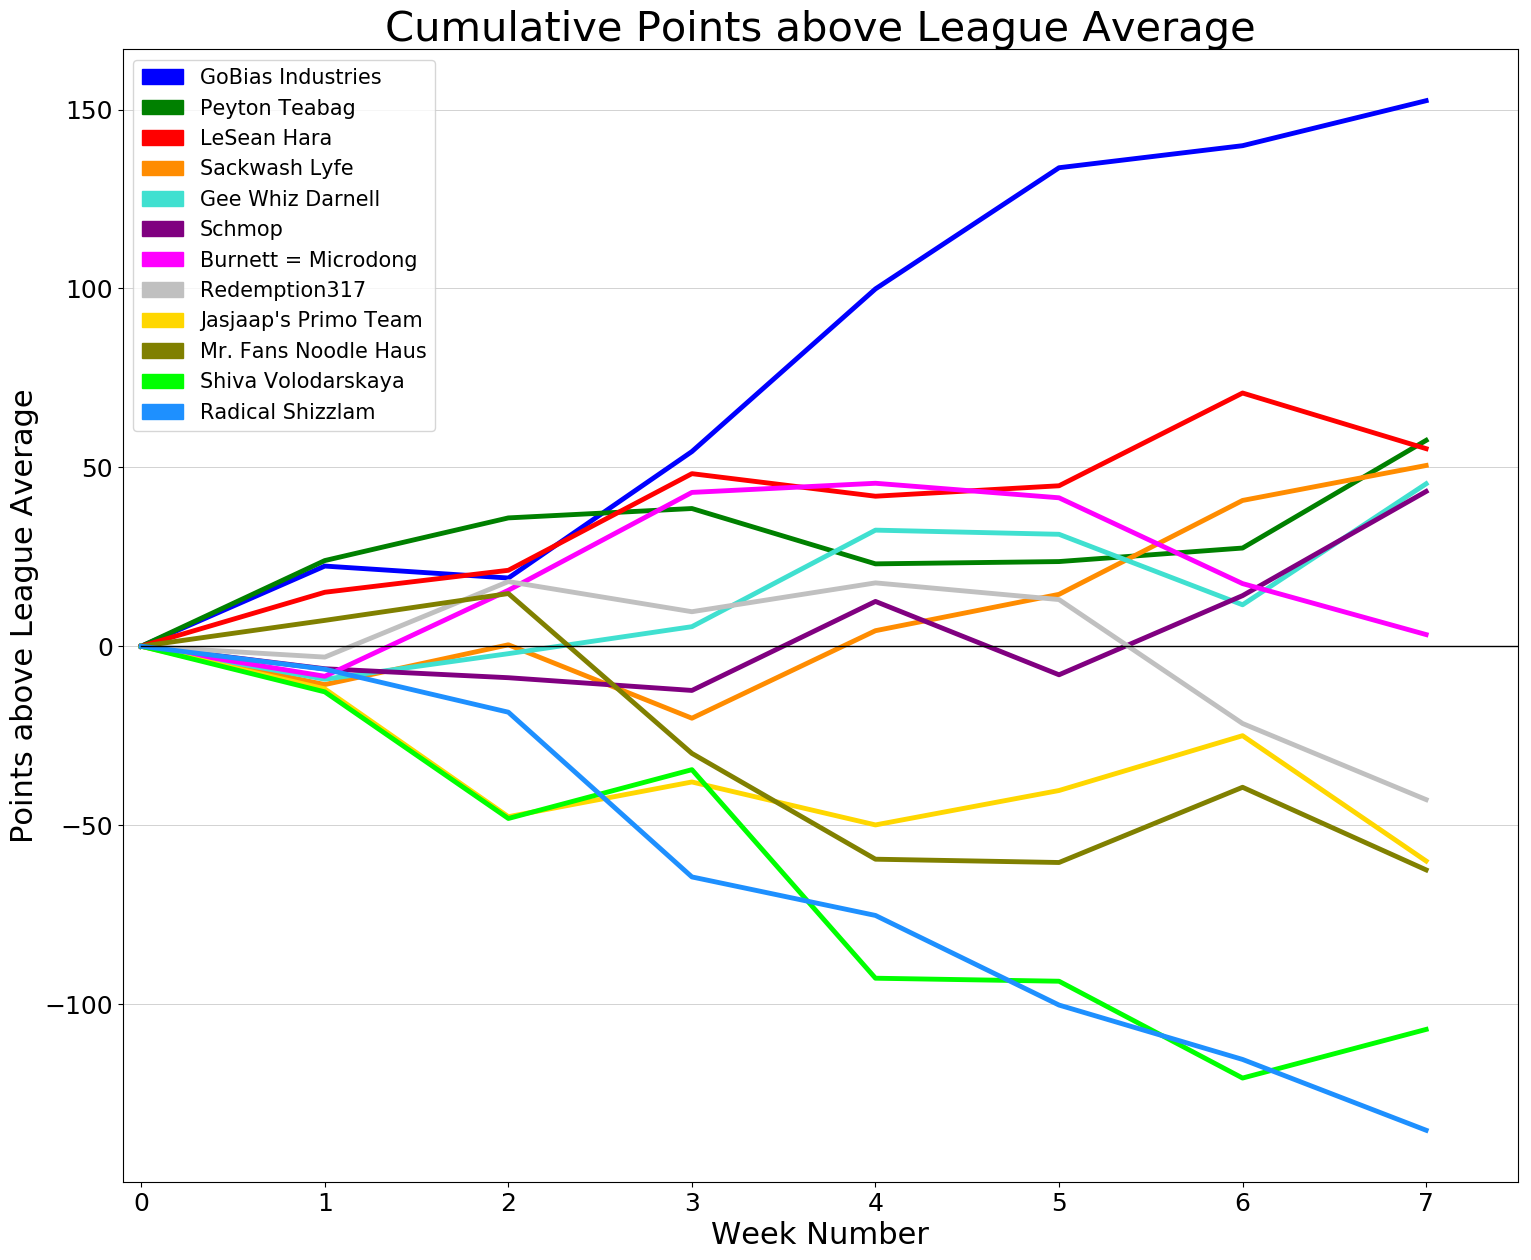

In [51]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'silver', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in np.arange(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=3.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,14], [0,0], color = 'k', lw=1)

plt.xlim([-0.1, 7.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':15})
plt.grid(axis='y', lw=0.4)

Text(0.5,1,'Points Per Game Per Team\n(at midseason mark)')

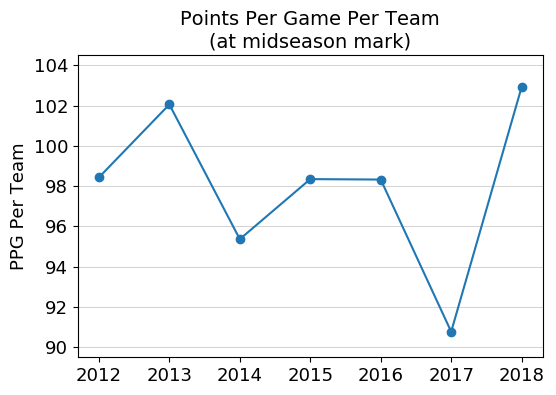

In [285]:
plt.plot(mmeans, marker='o')
plt.xticks(np.arange(7), ['2012', '2013', '2014', '2015', '2016', '2017','2018'])
plt.grid(axis='y', lw=0.4)
plt.ylim([89.5, 104.5])
plt.ylabel('PPG Per Team', size=13)
plt.yticks(size=13)
plt.xticks(size=13)

plt.title('Points Per Game Per Team\n(at midseason mark)', size = 14)



In [286]:
pd.DataFrame(np.round(mmeans,2), index=np.arange(2012,2019), columns=['PPG Per Team'])

,PPG Per Team
2012,98.43
2013,102.06
2014,95.37
2015,98.35
2016,98.33
2017,90.77
2018,102.92
